# Use scikit-learn for random forests

The wine data set is available in the scikit-learn datasets library.

In [1]:
# Import libraries and data sets
from sklearn.datasets import load_wine
import pandas as pd

# Load the data and convert to a DataFrame
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = pd.Series(data.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
# Separate into features and target

X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_classifier=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)
# Fit the model with our logistic regression classifier

print("model score: %.3f" % rf_classifier.score(X_test, y_test))

model score: 0.978


Now we can compare this to the results of the decision tree model we fit in the previous objective.

In [4]:
# Use the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
dt_classifier=DecisionTreeClassifier()

# Train the model using the training sets
dt_classifier.fit(X_train,y_train)

# Find the model score
print("Decision tree model score: %.3f" % dt_classifier.score(X_test, y_test))

Decision tree model score: 0.933


The decision tree model didn't perform as well as the random forest model, which was expected. Let's compare the feature importance for the models side-by-side.

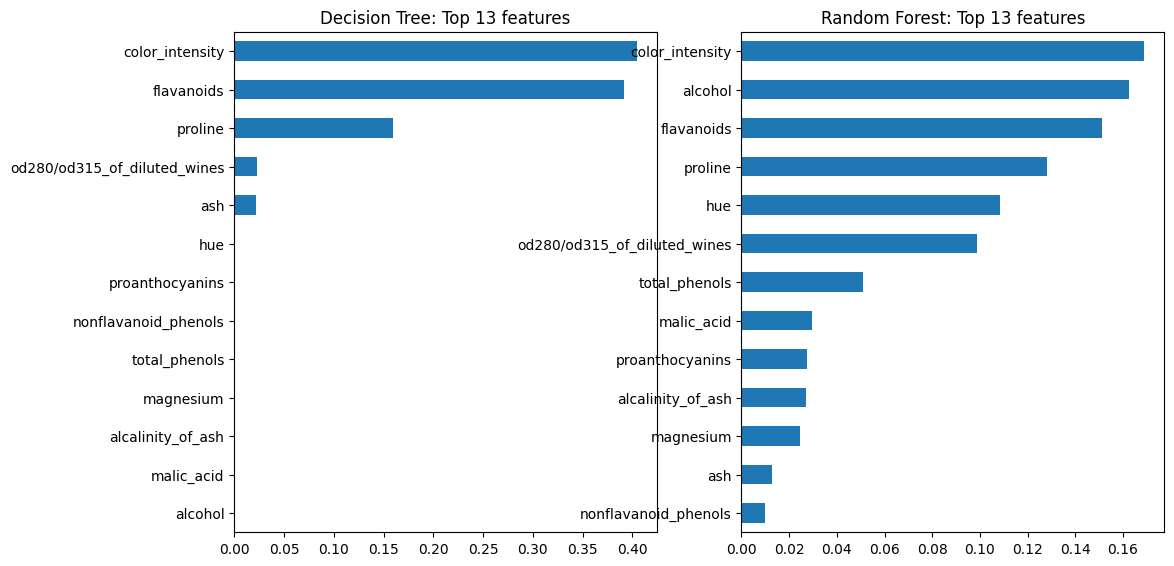

In [5]:
# Plot the feature importances
import matplotlib.pyplot as plt

rf_importances = pd.Series(rf_classifier.feature_importances_, X.columns)
dt_importances = pd.Series(dt_classifier.feature_importances_, X.columns)

# Plot top n feature importances
n = 13
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,n/2))
ax1.set_title(f'Decision Tree: Top {n} features')
ax2.set_title(f'Random Forest: Top {n} features')
dt_importances.sort_values()[-n:].plot.barh(ax=ax1)
rf_importances.sort_values()[-n:].plot.barh(ax=ax2)

fig.show()